# 1)Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
df = pd.read_csv("shampoo_sales.csv")

In [4]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [6]:
df.columns

Index(['Month', 'Sales'], dtype='object')

# step 1) Data Preprocessing

In [7]:
df = pd.read_csv("shampoo_sales.csv", index_col="Month", parse_dates=True)

In [8]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [9]:
# Head of The datasets

In [10]:
df.loc["1-01":"1-04"] #Using They loc in sales columns

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3


In [11]:
# df.loc["1-01"]

In [12]:
df.loc["1-01"].mean() # Find The mean of month columns

266.0

# plotting they graphs

<Axes: xlabel='Month'>

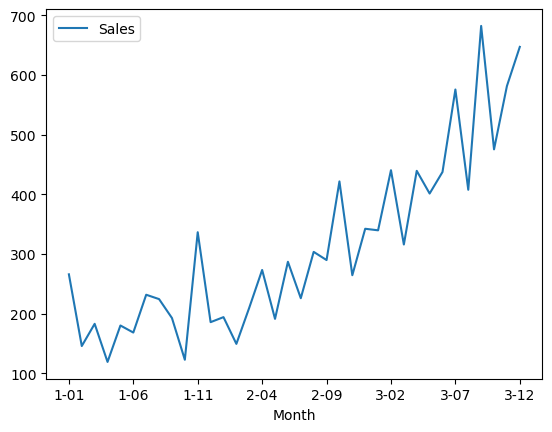

In [13]:
df.plot() # Plotting they graphs Sales

<Axes: xlabel='Month'>

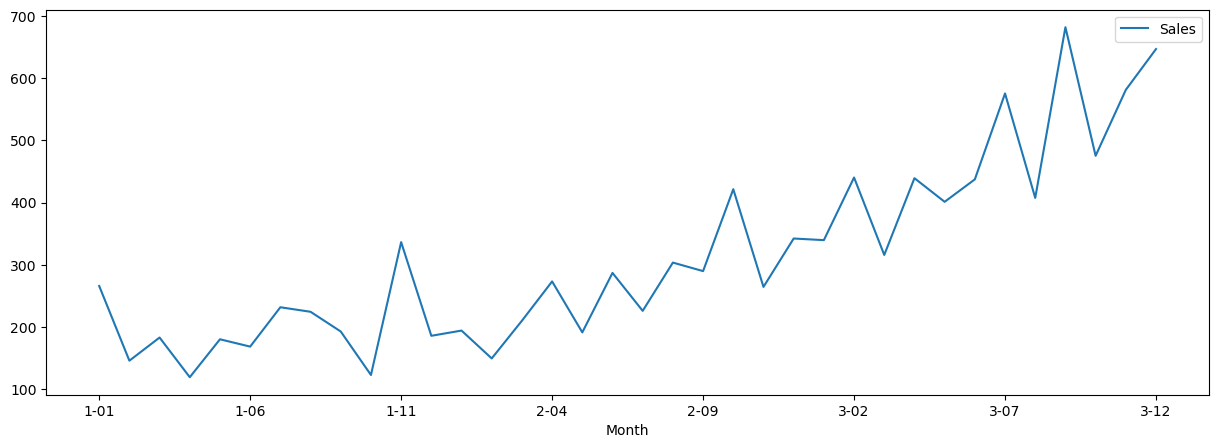

In [14]:
df.plot(figsize=(15,5)) #plot They figure in size(15,5)

In [15]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Step 2 : Data Analysis

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
df.index.freq = "MS" 
#The code df.index.freq = "MS" sets the frequency of the index in a pandas DataFrame df 
#to be monthly (denoted by "MS").

In [18]:
# Set 'Sales' column as the index

In [19]:
result = seasonal_decompose(df["Sales"], period=12) 
#The code df.index.freq = "MS" sets the frequency of the index in a pandas DataFrame df to be monthly.

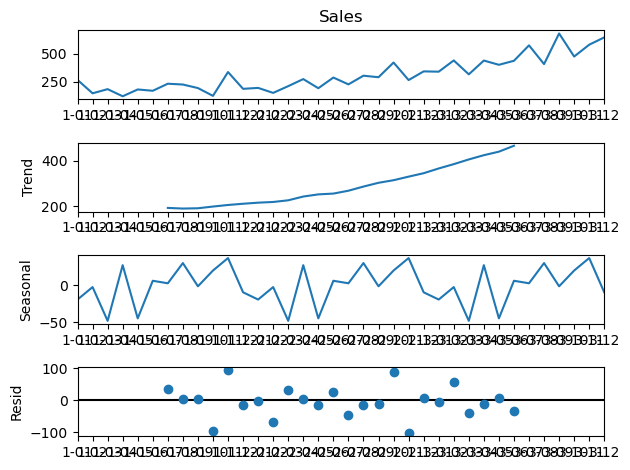

In [20]:
result.plot();#results are plotting

In [21]:
len(df) 

36

In [22]:
train = df.iloc[:32]
test = df.iloc[32:]

In [23]:
len(train)

32

In [24]:
len(test)

4

In [25]:
train.iloc[0], train.iloc[-1]

(Sales    266.0
 Name: 1-01, dtype: float64,
 Sales    407.6
 Name: 3-08, dtype: float64)

# Step:3) Data Splitting

In [26]:
from sklearn.preprocessing import MinMaxScaler # apply the preprocessing the data train & test

In [27]:
scaler = MinMaxScaler() #scaler MinMaxScaler()

In [28]:
scaler.fit(train) #scaler.fit(train)

MinMaxScaler()

In [29]:
scaled_train = scaler.transform(train)# separate the scaled_train & scaled_test in test & train
scaled_test = scaler.transform(test) # separate the scaled_test in the from of scaler.transform(test)

In [30]:
scaled_train[:5]

array([[0.32156949],
       [0.05830776],
       [0.13985094],
       [0.        ],
       [0.13371328]])

#scaled_train: This likely refers to a pandas DataFrame or a numpy array containing scaled or normalized training data. 
#This could be part of a machine learning pipeline where data is preprocessed before being fed into a model.

#[:5]: This is called slicing in Python.
#It's a way to select a subset of elements from a list, array, or DataFrame. 
#In this case, [:5] selects the first five elements of scaled_train.

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
n_input = 3

n_input: This variable name is likely short for "number of inputs" or "input size".
It could represent the number of input features or time steps used for a predictive model, 
such as a neural network or a time series forecasting model.

3: This value indicates that the number of inputs is 3. 
This could mean different things depending on the context of your code

In [33]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

#1)scaled_train: This likely represents your training data that has been scaled or normalized.
It could be a pandas DataFrame, numpy array, or any other data structure supported by TensorFlow.

#2)length=n_input: 
This parameter specifies the length of the input sequences to be generated. In this case, n_input is a variable that likely holds an integer value indicating the number of time steps or input features to include in each input sequence.

#3)batch_size=1: 
This parameter specifies the number of input-output pairs to include in each batch.


In [34]:
len(generator)

29

In [35]:
X, y = generator[0]
X.ravel(), y

(array([0.32156949, 0.05830776, 0.13985094]), array([[0.]]))

#X, y = generator[0]: 
This line retrieves the first batch of input-output pairs from the generator. generator[0]

#X.ravel(), y: After extracting the input-output pairs, this line prints or returns them. 
#X.ravel() converts the input sequences (X) into a 1-dimensional array,

In [36]:
X, y = generator[1]
X.ravel(), y

(array([0.05830776, 0.13985094, 0.        ]), array([[0.13371328]]))

In [37]:
scaled_train[:12]

array([[0.32156949],
       [0.05830776],
       [0.13985094],
       [0.        ],
       [0.13371328],
       [0.10784744],
       [0.24660237],
       [0.23060061],
       [0.16111355],
       [0.00789128],
       [0.47610697],
       [0.1459886 ]])

scaled_train: This likely represents a dataset, 
possibly a pandas DataFrame or a numpy array, containing scaled or normalized data.

[:12]: This is known as slicing in Python. 
It's a way to select a subset of elements from a list, array, or DataFrame. In this case, [:12] 

In [38]:
X, y = generator[8]
X.ravel(), y

(array([0.16111355, 0.00789128, 0.47610697]), array([[0.1459886]]))

In [39]:
X, y = generator[11]
X.ravel(), y

(array([0.1459886 , 0.16440158, 0.06619904]), array([[0.19903551]]))

In [40]:
X.shape # Shape of the X shape

(1, 3, 1)

In [41]:
df.head(3), df.tail(3)  

(       Sales
 Month       
 1-01   266.0
 1-02   145.9
 1-03   183.1,
        Sales
 Month       
 3-10   475.3
 3-11   581.3
 3-12   646.9)

#df.head(3) #top the first three rows of the DataFrame df.
#df.tail(3) # the last three rows of the DataFrame df

In [42]:
n_input = 12 # 
#The code n_input = 12 that you're defining a variable named n_input and assigning it the value of 12.

In [43]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

scaled_train: represents your training data that has been scaled or normalized.
It could be a pandas DataFrame, numpy array, or any other data structure supported by TensorFlow.

length=n_input: This parameter specifies the length of the input sequences to be generated. In this case, n_input is a variable that likely holds an integer value indicating the number of time steps or
input features to include in each input sequence.

batch_size=1: This parameter specifies the number of input-output pairs to include in each batch. 

In [44]:
X, y = generator[0]
X.ravel(), y

(array([0.32156949, 0.05830776, 0.13985094, 0.        , 0.13371328,
        0.10784744, 0.24660237, 0.23060061, 0.16111355, 0.00789128,
        0.47610697, 0.1459886 ]),
 array([[0.16440158]]))

This line retrieves the first batch of input-output pairs from the generator object generator. generator[0]
X.ravel(), y: After extracting the input-output pairs, this line prints or returns them.
X.ravel() converts the input sequences (X) into a 1-dimensional array, which  

In [45]:
X.shape #perform the model

(1, 12, 1)

# Step 4: Model Building

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense, LSTM

In [48]:
model = Sequential()

 #This is a class provided by Keras that represents a linear stack of layers. It's called "sequential"

In [49]:
model.add(LSTM(1000, activation="relu", input_shape=(12, 1)))
model.add(Dense(1))

activation="relu": This sets the activation function of the LSTM units to Rectified Linear Unit (ReLU).
ReLU is a commonly used activation function in neural networks.

input_shape=(12, 1): This specifies the shape of the input data expected by this layer. 
    
Dense(1): This line adds a dense (fully connected) layer to the model with a single neuron.  

In [50]:
model.compile(optimizer="adam", loss="mse")

This parameter specifies the loss function to be used during training. In this case.
"mse" refers to Mean Squared Error

In [51]:
model.fit(generator, epochs=40)

Epoch 1/40
20/20 [==============================] - 9s 379ms/step - loss: 0.0592
Epoch 2/40
20/20 [==============================] - 7s 366ms/step - loss: 0.0318
Epoch 3/40
20/20 [==============================] - 7s 336ms/step - loss: 0.0267
Epoch 4/40
20/20 [==============================] - 7s 328ms/step - loss: 0.0365
Epoch 5/40
20/20 [==============================] - 7s 334ms/step - loss: 0.0353
Epoch 6/40
20/20 [==============================] - 7s 335ms/step - loss: 0.0399
Epoch 7/40
20/20 [==============================] - 7s 330ms/step - loss: 0.0245
Epoch 8/40
20/20 [==============================] - 7s 333ms/step - loss: 0.0253
Epoch 9/40
20/20 [==============================] - 7s 331ms/step - loss: 0.0277
Epoch 10/40
20/20 [==============================] - 7s 335ms/step - loss: 0.0327
Epoch 11/40
20/20 [==============================] - 7s 332ms/step - loss: 0.0308
Epoch 12/40
20/20 [==============================] - 7s 330ms/step - loss: 0.0198
Epoch 13/40
20/20 [======

model.fit: This method is used to train the model. 
generator: This parameter represents the data
generator that provides batches of input-output pairs for training.
epochs=40: This parameter specifies the number of epochs for which the model will be trained.

In [52]:
loss = model.history.history["loss"]

model.history: This accesses the history object of the trained model. 
The history object contains information about the training process.
model.history.history["loss"]: This accesses the "loss" metric from the history object
This assigns the values of the loss metric to the variable loss.

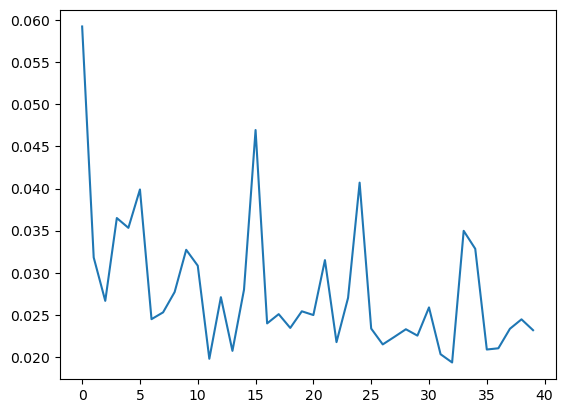

In [53]:
plt.plot(loss)

In [54]:
last_train_batch = scaled_train[-12:]

training data that has been scaled or normalized. It could be a pandas DataFrame, numpy array.
[-12:]: This is called slicing in Python.
It's a way to select a subset of elements from a list, array, or DataFrame.

In [55]:
last_train_batch = last_train_batch.reshape(1, 12, 1) # last_train_batch in reshape(1,12, 1)

In [56]:
last_train_batch

array([[[0.37395879],
        [0.66264796],
        [0.31828146],
        [0.48882069],
        [0.48312144],
        [0.70385796],
        [0.43095134],
        [0.70144673],
        [0.61814993],
        [0.69728189],
        [1.        ],
        [0.63195967]]])

# Step 5 Model validation

In [57]:
model.predict(last_train_batch) # predicate the model in last train batch

1/1 [==============================] - 0s 221ms/step


array([[0.7884476]], dtype=float32)

In [58]:
scaled_test[0] #scaled_test[0] in the array

array([1.23345024])

In [59]:
test_pred = []

first_eval_batch = scaled_train[-15:]
current_batch = first_eval_batch.reshape((1, 15, 1))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 49ms/step


test_pred = []: This initializes an empty list to store the predicted values.
first_eval_batch = scaled_train[-15:]: 
This selects the last 15 elements from the scaled_train dataset and assigns them to first_eval_batch

current_batch = first_eval_batch.reshape((1, 15, 1)):
This reshapes first_eval_batch into a 3-dimensional array with shape (1, 15, 1).

for i in range(len(test)):: 
This loop iterates over the length of the test data (assuming test is the test dataset).
current_pred = model.predict(current_batch)[0]:
This line predicts the next value based on the current batch (current_batch) using the trained model (model). 

test_pred.append(current_pred): 
This appends the predicted value (current_pred) to the list of test predictions (test_pred).


In [60]:
test_pred # test_predicated values

[array([0.7977141], dtype=float32),
 array([0.82315147], dtype=float32),
 array([0.8469917], dtype=float32),
 array([0.8686124], dtype=float32)]

In [61]:
test.head() #test.head()

,Sales
Month,
3-09,682.0
3-10,475.3
3-11,581.3
3-12,646.9


In [62]:
true_pred = scaler.inverse_transform(test_pred)

The code true_pred = scaler.inverse_transform(test_pred) appears to be transforming the predicted values
(test_pred) back to their original scale using an inverse transformation.

In [63]:
test["Predicated Sales"] = true_pred

new column named "Predicted Sales" to a DataFrame test and populating it with 
the values stored in the variable true_pred.

In [64]:
test.head() #head of the test

,Sales,Predicated Sales
Month,,
3-09,682.0,483.217179
3-10,475.3,494.821700
3-11,581.3,505.697622
3-12,646.9,515.560981


<Axes: xlabel='Month'>

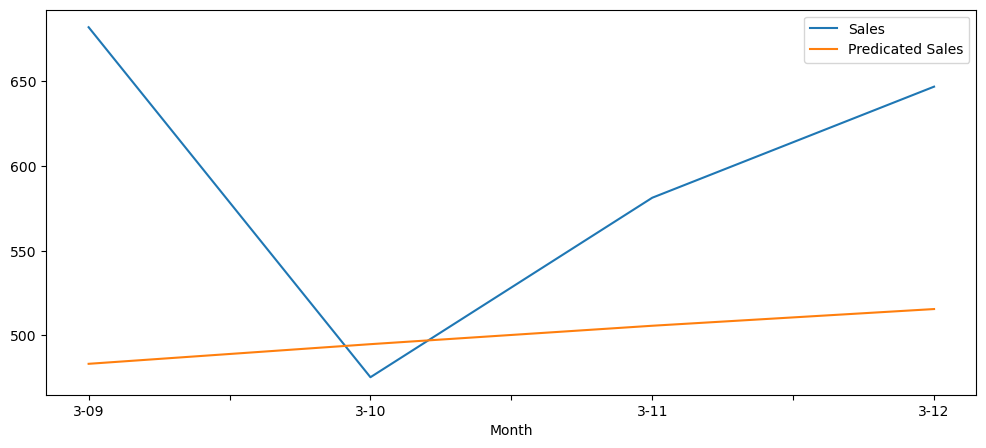

In [65]:
test.plot(figsize=(12,5))

In [66]:
from sklearn.metrics import mean_squared_error 

In [67]:
rsme = np.sqrt(mean_squared_error(test["Sales"], test["Predicated Sales"]))

mean_squared_error(test["Sales"], test["Predicted Sales"]):
This computes the mean squared error (MSE) between the actual sales values (test["Sales"]) and 
the predicted sales values (test["Predicted Sales"]). 
The MSE measures the average squared difference between the predicted and actual values

np.sqrt(): This is a function from the NumPy library that calculates the square root of a value. 

In [68]:
rsme

125.36084348483917

# Smmary of datasets

Convert the 'Month' column to a datetime format.
Set the 'Month' column as the index of the DataFrame.
Use the seasonal_decompose function to decompose the time series data into its trend, seasonal, and residual components.

1)We create a DataFrame df from the provided data.
2)Convert the 'Month' column to datetime format using pd.to_datetime.
3)Set the 'Month' column as the index of the DataFrame using set_index.
4)Perform seasonal decomposition using seasonal_decompose, assuming a yearly seasonality (period=12).
5)Print the decomposition result.
